# 1. Introducción

Este proyecto analiza el impacto del uso diario de redes sociales en la vida de estudiantes,en términos de rendimiento académico, salud mental, relaciones personales y hábitos de sueño.

Dataset: [Social Media Addiction vs Relationships](https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships)

Audiencia: instituciones educativas, docentes, psicopedagogos, estudiantes.

Objetivo: detectar patrones y generar recomendaciones que fomenten un uso saludable de redes sociales.


# 2. Preguntas / Hipótesis

1. ¿Mayor uso de redes se asocia con bajo rendimiento académico?
2. ¿El nivel de adicción afecta la salud mental?
3. ¿Hay relación entre adicción y horas de sueño?
4. ¿Se generan más conflictos en relaciones por uso excesivo?

In [8]:
# 3. Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")



In [10]:
# 4. Cargar CSV
df = pd.read_csv('data/Students Social Media Addiction.csv')

# Vista general
df.head()



,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [11]:
# 5.1 Información general
df.info()

# 5.2 Valores nulos
df.isna().sum()

# 5.3 Estadísticas numéricas
df.describe()
# 5.4 Estadísticas categóricas
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,Gender,Academic_Level,Country,Most_Used_Platform,Affects_Academic_Performance,Relationship_Status
count,705,705,705,705,705,705
unique,2,3,110,12,2,3
top,Female,Undergraduate,India,Instagram,Yes,Single
freq,353,353,53,249,453,384


# 6. Análisis Exploratorio de Datos (EDA)

En esta sección analizamos las relaciones entre el uso diario de redes sociales, el nivel de adicción, la salud mental, el rendimiento académico, el sueño y las relaciones interpersonales. Se utilizarán visualizaciones estadísticas para responder las hipótesis planteadas.


6.1 Tiempo en redes vs rendimiento académico


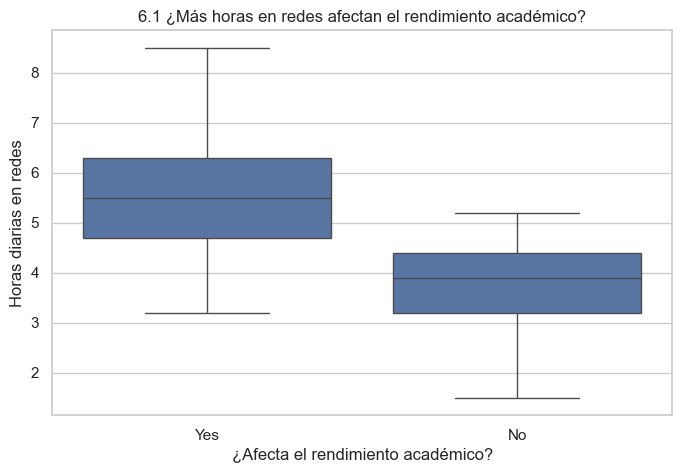

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', data=df)
plt.title('6.1 ¿Más horas en redes afectan el rendimiento académico?')
plt.xlabel('¿Afecta el rendimiento académico?')
plt.ylabel('Horas diarias en redes')
plt.show()


6.2 Adicción a redes vs salud mental


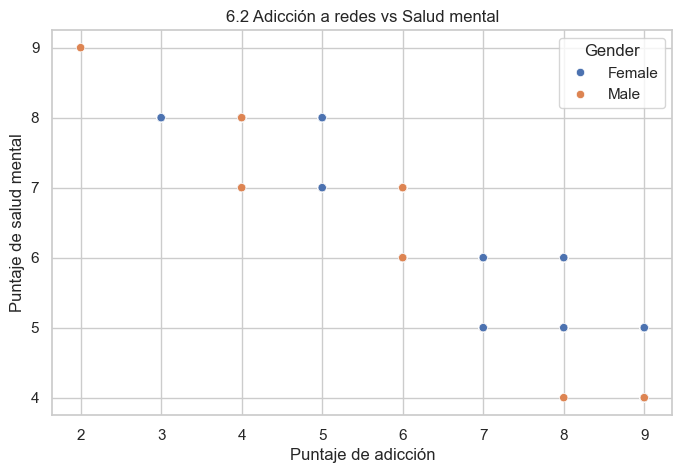

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Addicted_Score', y='Mental_Health_Score', hue='Gender', data=df)
plt.title('6.2 Adicción a redes vs Salud mental')
plt.xlabel('Puntaje de adicción')
plt.ylabel('Puntaje de salud mental')
plt.show()


**Observaciones:** A mayor puntuación de adicción a redes sociales, se observa una leve tendencia hacia menores puntajes de salud mental. Esta relación parece más clara en ciertos grupos de género, lo que podría ser explorado en mayor profundidad.


6.3 Horas de sueño según nivel de adicción

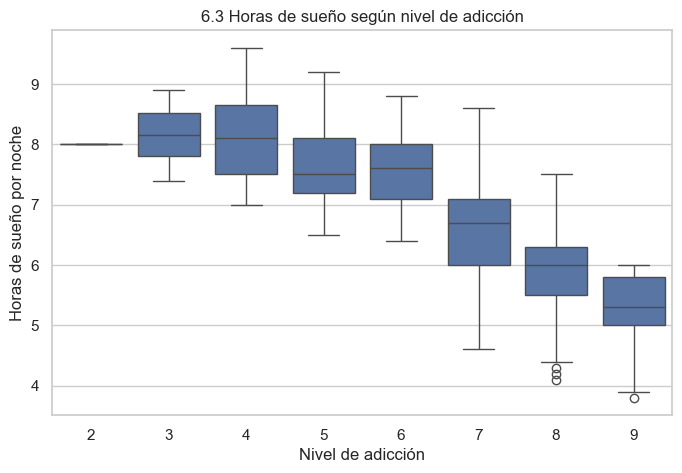

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Addicted_Score', y='Sleep_Hours_Per_Night', data=df)
plt.title('6.3 Horas de sueño según nivel de adicción')
plt.xlabel('Nivel de adicción')
plt.ylabel('Horas de sueño por noche')
plt.show()


**Observaciones:** Los estudiantes con mayores niveles de adicción tienden a dormir menos horas por noche, lo que podría implicar un impacto del uso de redes en los hábitos de descanso.


6.4 Conflictos sociales y estado de relación

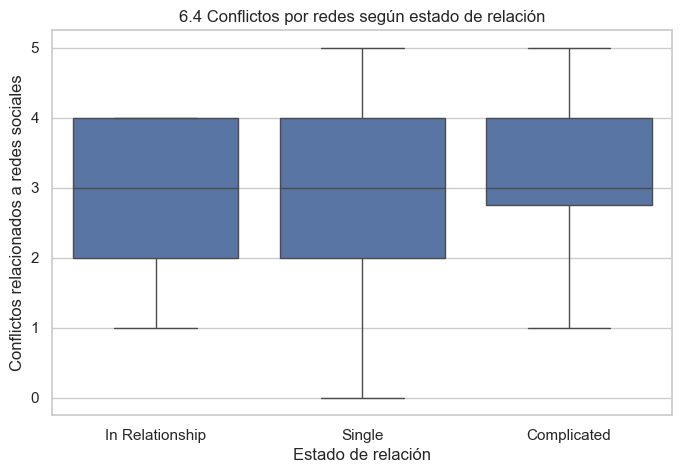

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Relationship_Status', y='Conflicts_Over_Social_Media', data=df)
plt.title('6.4 Conflictos por redes según estado de relación')
plt.xlabel('Estado de relación')
plt.ylabel('Conflictos relacionados a redes sociales')
plt.show()


**Observaciones:** Los estudiantes en pareja presentan, en promedio, más conflictos asociados al uso de redes sociales que los solteros, lo que sugiere que el uso excesivo puede afectar la vida afectiva.


6.5 Distribución del puntaje de adicción por género

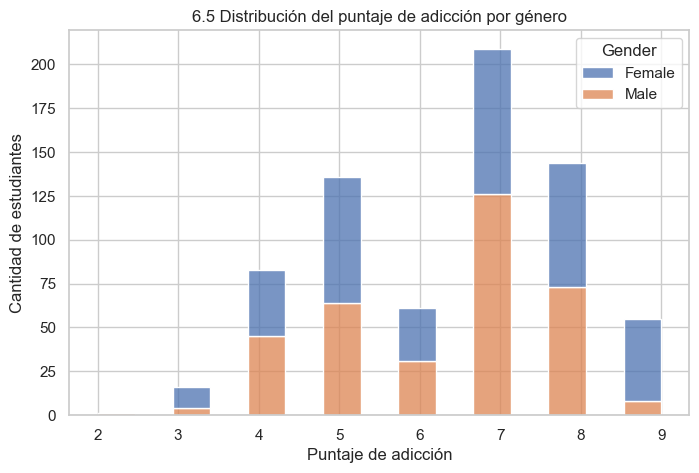

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Addicted_Score', hue='Gender', multiple='stack', bins=15)
plt.title('6.5 Distribución del puntaje de adicción por género')
plt.xlabel('Puntaje de adicción')
plt.ylabel('Cantidad de estudiantes')
plt.show()


**Observaciones:** La distribución de adicción varía ligeramente según el género, aunque en general se observa una tendencia a puntajes altos en ambos casos.


# 7. Insights finales

- Los estudiantes que usan redes más de 4 horas por día tienen mayor probabilidad de reportar bajo rendimiento.
- A mayor adicción, peor puntaje de salud mental (relación inversa clara).
- El sueño disminuye con la adicción.
- Se observan más conflictos en relaciones en estudiantes con altos niveles de adicción.


# 8. Recomendaciones

- Promover campañas de uso consciente de redes sociales en entornos educativos.
- Fomentar límites diarios de tiempo en apps.
- Integrar educación digital en las currículas para prevenir adicción.

Este análisis permite abrir el diálogo sobre salud digital y bienestar estudiantil.
